# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [4]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [5]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 119MB/s] 


In [6]:
!unzip /content/perros_y_gatos.zip > /dev/null

replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/cats/cat.1502.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test/cats/cat.1503.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
!ls

drive  perros_y_gatos.zip  sample_data	test  train  validation


In [8]:
cd /content

/content


In [9]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [12]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
imgs, labels = next(train_generator)

In [16]:
labels

array([1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1.], dtype=float32)

In [18]:
imgs.shape

(20, 150, 150, 3)

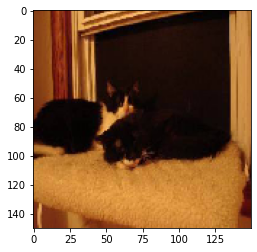

In [20]:
plt.imshow(imgs[1,::])

In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)

# plt.show()

In [11]:
!ls

drive  perros_y_gatos.zip  sample_data	test  train  validation


In [24]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [27]:
model = models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [28]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 99s 991ms/step - loss: 0.6912 - acc: 0.5210 - val_loss: 0.6766 - val_acc: 0.6080
Epoch 2/5
100/100 [==============================] - 93s 931ms/step - loss: 0.6560 - acc: 0.6200 - val_loss: 0.6433 - val_acc: 0.6230
Epoch 3/5
100/100 [==============================] - 93s 927ms/step - loss: 0.6054 - acc: 0.6655 - val_loss: 0.6095 - val_acc: 0.6510
Epoch 4/5
100/100 [==============================] - 93s 933ms/step - loss: 0.5607 - acc: 0.6980 - val_loss: 0.5938 - val_acc: 0.6760
Epoch 5/5
100/100 [==============================] - 93s 931ms/step - loss: 0.5370 - acc: 0.7270 - val_loss: 0.5731 - val_acc: 0.6880


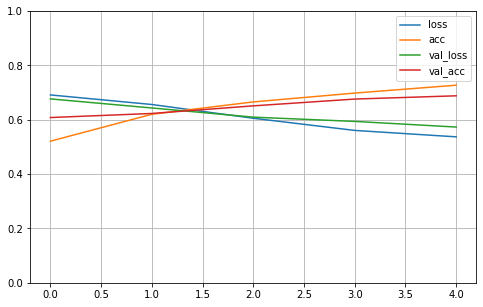

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

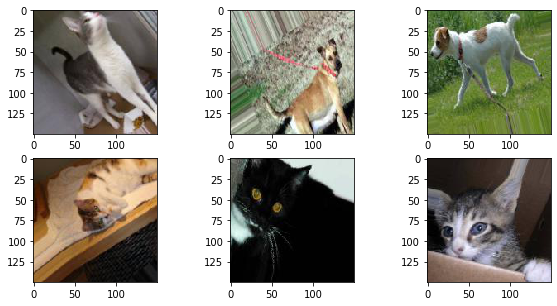

In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [61]:
#### COMPLETAR #####
### usar el mismo modelo de antes
model2 = models.Sequential()
model2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation="relu"))
model2.add(keras.layers.Dense(64, activation="relu"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [62]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/10
60/60 [==============================] - 99s 2s/step - loss: 0.7166 - acc: 0.5021 - val_loss: 0.6922 - val_acc: 0.5088
Epoch 2/10
60/60 [==============================] - 98s 2s/step - loss: 0.6941 - acc: 0.5215 - val_loss: 0.6923 - val_acc: 0.5175
Epoch 3/10
60/60 [==============================] - 98s 2s/step - loss: 0.6986 - acc: 0.5420 - val_loss: 0.6696 - val_acc: 0.6363
Epoch 4/10
60/60 [==============================] - 98s 2s/step - loss: 0.6852 - acc: 0.5945 - val_loss: 0.6366 - val_acc: 0.6112
Epoch 5/10
60/60 [==============================] - 99s 2s/step - loss: 0.6603 - acc: 0.6376 - val_loss: 0.6228 - val_acc: 0.6413
Epoch 6/10
60/60 [==============================] - 100s 2s/step - loss: 0.6315 - acc: 0.6455 - val_loss: 0.6251 - val_acc: 0.6612
Epoch 7/10
60/60 [==============================] - 100s 2s/step - loss: 0.7328 - acc: 0.6691 - val_loss: 0.5979 - val_acc: 0.6712
Epoch 8/10
60/60 [==============================] - 100s 2s/step - loss: 0.5878 - acc: 0

In [50]:
validation_generator.samples/validation_generator.batch_size

31.25

In [54]:
train_generator.samples/train_generator.batch_size

62.5

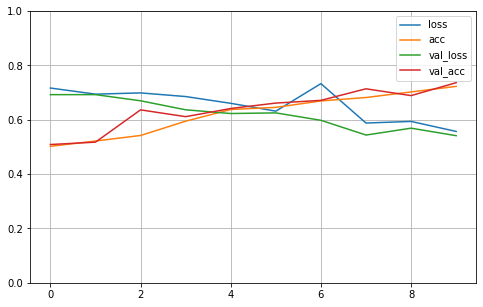

In [64]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()